In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.2


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
bdata = sc.read_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_vdj.h5ad')
bdata

AnnData object with n_obs × n_vars = 70501 × 318
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [14]:
sc.tl.pca(bdata)

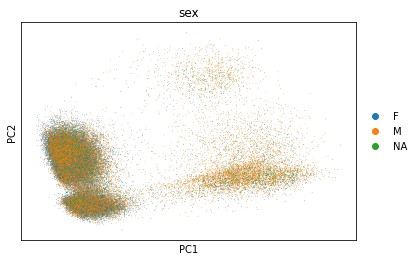

In [15]:
sc.pl.pca(bdata, color = 'sex')

In [ ]:
sc.pl.pca(bdata, color = 'centre')

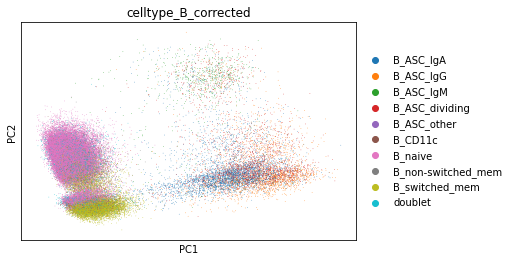

In [19]:
sc.pl.pca(bdata, color = 'celltype_B_corrected')

In [ ]:
sc.pl.pca(bdata, color = 'centre')

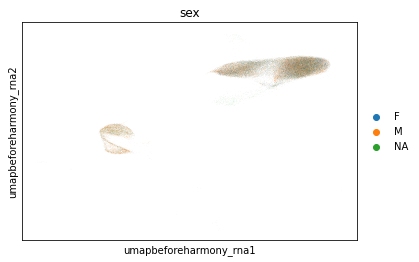

In [11]:
sc.pl.embedding(bdata, basis = 'umapbeforeharmony_rna', color = 'sex', size = 0.1)

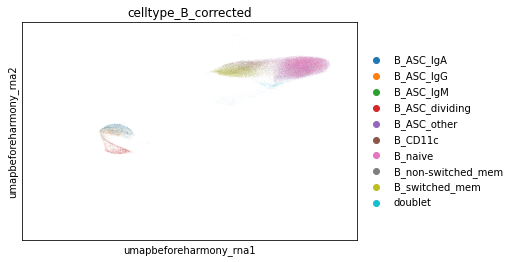

In [13]:
sc.pl.embedding(bdata, basis = 'umapbeforeharmony_rna', color = 'celltype_B_corrected', size = 0.1)

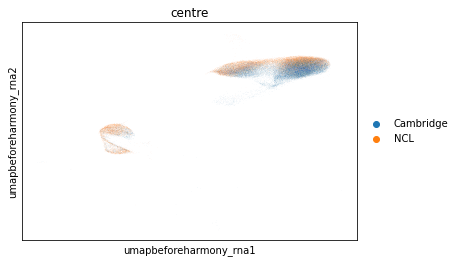

In [10]:
sc.pl.embedding(bdata, basis = 'umapbeforeharmony_rna', color = 'centre', size = 0.1)

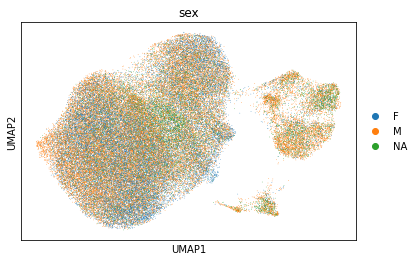

In [4]:
sc.pl.umap(bdata, color = 'sex')

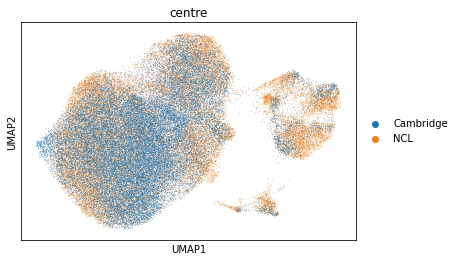

In [5]:
sc.pl.umap(bdata, color = 'centre')

In [4]:
ifngenes = ["IRF7", "XAF1", "UBE2L6", "TRIM22", "STAT1", "SP110", "SAMD9L", "SAMD9", "PLSCR1", "PARP9", "OAS2", "OAS1", "MX2", "MX1", "LY6E", "ISG15", "IFIT3", "IFI6", "IFI44L", "IFI35", "HERC5", "EPSTI1", "EIF2AK2", "CMPK2", "BST2"]

In [5]:
sc.tl.score_genes(bdata, ifngenes, score_name = 'Interferon_score', use_raw = True)

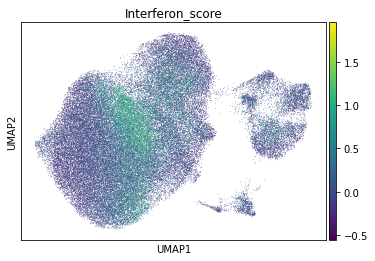

In [6]:
sc.pl.umap(bdata, color = 'Interferon_score')

In [7]:
# convert to z-score
from scipy.stats import zscore
bdata.obs['Interferon_zscore'] = zscore(bdata.obs['Interferon_score'])

In [8]:
bdata.obs['Interferon_group'] = ['High' if x >= 1 else 'Low' for x in bdata.obs['Interferon_zscore']]

... storing 'Interferon_group' as categorical


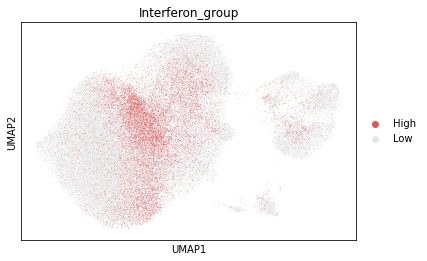

In [9]:
sc.pl.umap(bdata, color = 'Interferon_group', palette = {'Low':'#e5e5e5', 'High':'#e15759'})

In [10]:
pd.crosstab(bdata.obs['celltype_B_corrected'], bdata.obs['Interferon_group'])

Interferon_group,High,Low
celltype_B_corrected,,
B_ASC_IgA,342,3172
B_ASC_IgG,93,1732
B_ASC_IgM,44,595
B_ASC_dividing,138,2237
B_ASC_other,2,35
B_CD11c,386,2267
B_naive,8458,32978
B_non-switched_mem,255,2960
B_switched_mem,1552,9442


In [12]:
bdata.obs['celltype_B_corrected_IFN'] = [a+'_'+b if a != "doublet" else "doublet" for a,b in zip(bdata.obs['celltype_B_corrected'], bdata.obs['Interferon_group'])]

... storing 'celltype_B_corrected_IFN' as categorical


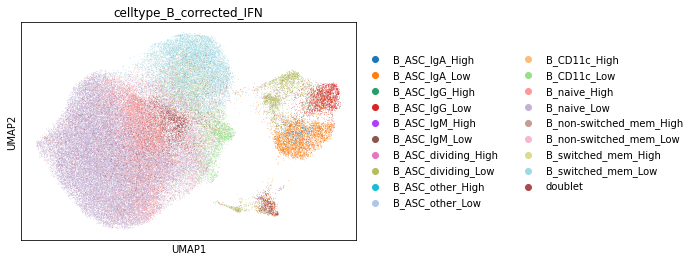

In [13]:
sc.pl.umap(bdata, color = 'celltype_B_corrected_IFN')

In [14]:
bdata.write('h5ad/df.fil3_gex_bcells_no_CLL_vdj.h5ad', compression = 'gzip')

In [15]:
bdata2 = bdata[bdata.obs['celltype_B_corrected'] != 'doublet']
bdata2

View of AnnData object with n_obs × n_vars = 66688 × 318
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_com

In [16]:
list(set(bdata.obs['celltype_B_corrected']))

['B_ASC_other',
 'doublet',
 'B_ASC_IgG',
 'B_ASC_IgM',
 'B_naive',
 'B_ASC_IgA',
 'B_non-switched_mem',
 'B_switched_mem',
 'B_ASC_dividing',
 'B_CD11c']

In [17]:
bdict = {'B_ASC_IgG':'B_ASC',
  'B_non-switched_mem':'B',
  'B_ASC_dividing':'B',
  'B_CD11c':'B',
  'B_naive':'B',
  'B_ASC_other':'B_ASC',
  'B_ASC_IgA':'B_ASC',
  'B_switched_mem':'B',
  'B_ASC_IgM':'B_ASC',}
bdata2.obs['celltype_B_corrected_group']=[bdict[x] for x in bdata2.obs['celltype_B_corrected']]

Trying to set attribute `.obs` of view, copying.


In [18]:
bdata2.obs[['celltype_B_corrected_group', 'celltype_B_corrected', 'celltype_B_corrected_IFN']].to_csv('imperial_renal_B_obs.csv')